Соломин Дмитрий, гр. 932328

In [20]:
# Проверка содержимого папки с данными
!ls /kaggle/input


cats-and-dogs-image-classification


Лабораторная работа №2. Бинарный классификатор.
Цель работы – написать программу на языке Python, используя Jupyter Notebook, выполняющую построение и обучение нейронных сетей прямого распространения, решающих задачу бинарной классификации по вариантам, требуется подобрать безизбыточную архитектуру сети, работающей с допустимым уровнем ошибки и визуализировать процесс обучения моделей. Результаты работы привести в отчете.
В рамках данной лабораторной работы предполагается построение бинарного
классификатора с помощью полносвязной нейронной сети
Задание
1. Выберите предметную область
2. Спроектируйте полносвязную нейронную сеть с использованием Python и
TensorFlow

Построение бинарного классификатора:

Построение бинарного классификатора. Написать программу на Python, которая обучает нейросетевой регрессор, с помощью библиотек scikit-learn и keras (опционально PyTorch). Датасет – Кот и Собака.

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

1. Импорт библиотек
Библиотеки для загрузки данных, построения модели, вычисления метрик и визуализации.

numpy, pandas: работа с массивами и данными.
matplotlib.pyplot, seaborn: визуализация данных.
sklearn.metrics: расчёт метрик для оценки модели.
tensorflow и keras: создание и обучение нейронной сети.
ImageDataGenerator: генератор данных для загрузки изображений.

In [ ]:
# Импорт необходимых библиотек
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


2. Загрузка и подготовка данных
Была выполнена загрузка набора данных, его анализ и подготовка к обучению модели.

In [39]:
train_dir = '/kaggle/input/cats-and-dogs-image-classification/train'
test_dir = '/kaggle/input/cats-and-dogs-image-classification/test'

3.Создание генераторов данных
Генераторы данных автоматически масштабируют изображения (деление каждого пикселя на 255), чтобы нормализовать значения между 0 и 1.


In [40]:
# Создаем генератор для тренировочных и тестовых данных с масштабированием (нормализация значений пикселей)
train_datagen = ImageDataGenerator(rescale=1.0/255.0) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  

4.Загрузка данных с использованием генераторов
Генераторы загружают изображения из указанных директорий и изменяют размер изображений до 150x150. 

In [41]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Изменение размера изображений до 150x150
    batch_size=64,  # Размер пакета
    class_mode='binary'  # Бинарная классификация (кошка/собака)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Изменение размера изображений до 150x150
    batch_size=64,  # Размер пакета
    class_mode='binary'  # Бинарная классификация
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


5.Визуализация данных

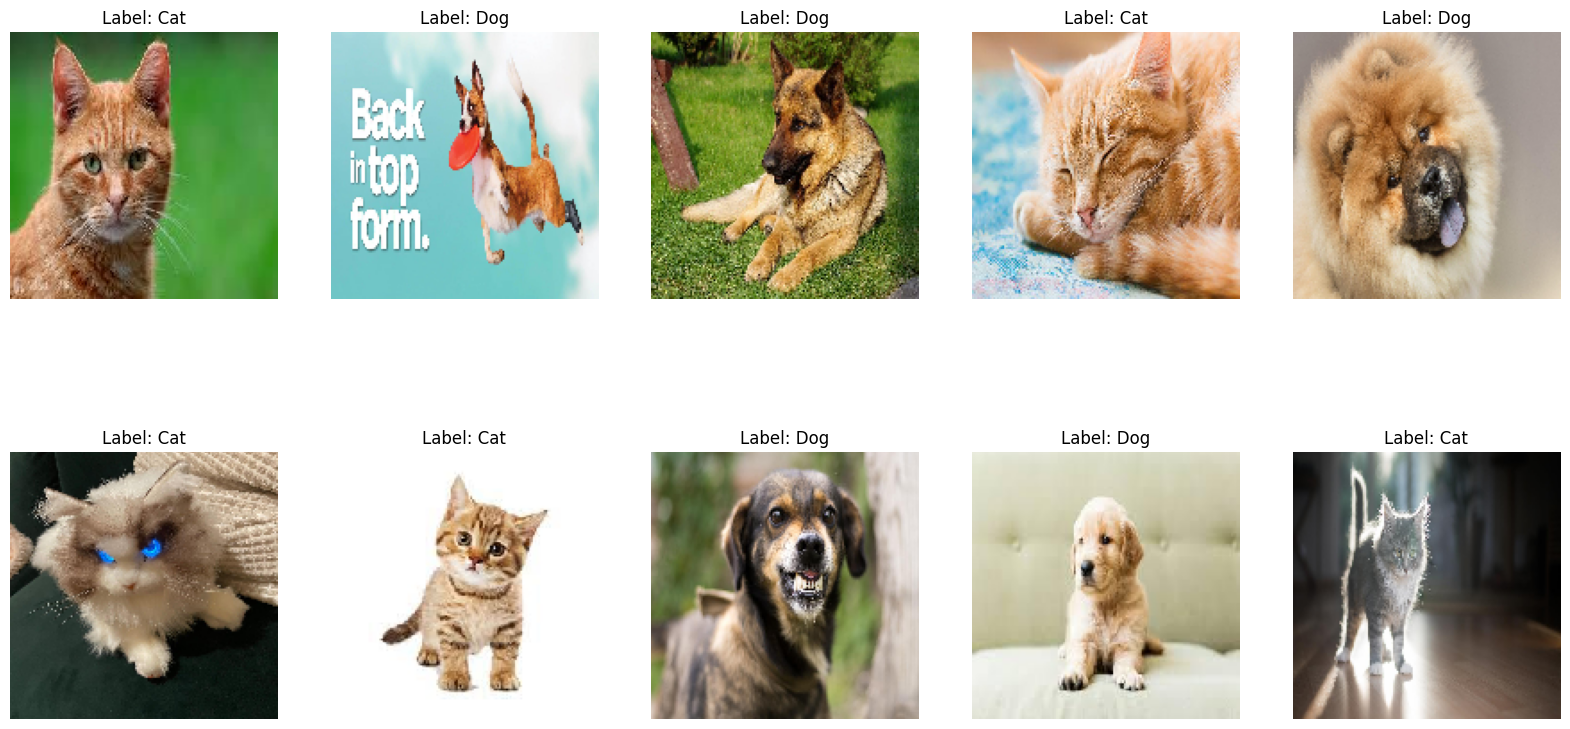

In [42]:
# Получаем один батч изображений и меток из train_generator для визуализации
images, labels = next(train_generator)  # Получаем пакет изображений и меток

# Визуализация первых 10 изображений из пакета с метками
plt.figure(figsize=(20, 10))
for i in range(10):  # Проходим по первым 10 изображениям
    plt.subplot(2, 5, i + 1)  # Создаем сетку 2x5 для отображения изображений
    plt.imshow(images[i])  # Отображаем изображение
    plt.title(f'Label: {"Dog" if labels[i] == 1 else "Cat"}')  # Показываем метку (кошка или собака)
    plt.axis('off')  # Отключаем оси для улучшения визуализации
plt.show() 


6.Построение нейронной сети
Последовательная нейронная сеть с несколькими сверточными и pooling слоями для извлечения признаков. Завершается полносвязным слоем с сигмоидальной активацией, чтобы решить задачу бинарной классификации.

In [72]:
# Построение модели нейронной сети
model = Sequential([
    # Первый сверточный слой с 32 фильтрами, активацией ReLU и входной размерностью изображения 150x150x3
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling для уменьшения размерности изображения
    
    # Второй сверточный слой с 64 фильтрами
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling

    # Третий сверточный слой с 128 фильтрами
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling
    
    # Преобразуем данные в одномерный вектор
    Flatten(),

    # Полносвязные слои для классификации
    Dense(16, activation='relu'),  # Полносвязный слой с 16 нейронами
    Dense(16, activation='relu'),  # Полносвязный слой с 16 нейронами

    # Выходной слой с одним нейроном и сигмоидальной функцией активации для бинарной классификации
    Dense(1, activation='sigmoid')
])


7.Компиляция и обучение модели
Модель компилируется с использованием оптимизатора adam, а функция потерь binary_crossentropy применима для бинарной классификации. Модель обучается на тренировочном наборе в течение 5 эпох с валидацией на тестовом наборе.

In [73]:
# Компиляция модели с оптимизатором Adam и функцией потерь 'binary_crossentropy' для бинарной классификации
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод архитектуры модели
model.summary()

# Обучение модели на 5 эпохах с использованием генераторов данных
history = model.fit(
    train_generator,  # Тренировочные данные
    epochs=10,  # Количество эпох
    batch_size=64,  # Размер батча
    validation_data=test_generator  # Тестовые данные для валидации
)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │       591,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,425 (2.61 MB)

 Trainable params: 685,425 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4979 - loss: 0.7070 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5146 - loss: 0.6861 - val_accuracy: 0.6000 - val_loss: 0.6847
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6121 - loss: 0.6703 - val_accuracy: 0.5071 - val_loss: 0.7685
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5614 - loss: 0.7005 - val_accuracy: 0.5500 - val_loss: 0.6881
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6558 - loss: 0.6538 - val_accuracy: 0.6429 - val_loss: 0.6864


8.Визуализация результатов обучения
Графики показывают изменения точности и потерь в процессе обучения и валидации. Это позволяет оценить, насколько хорошо модель обучалась на тренировочных данных и обобщалась на тестовых.

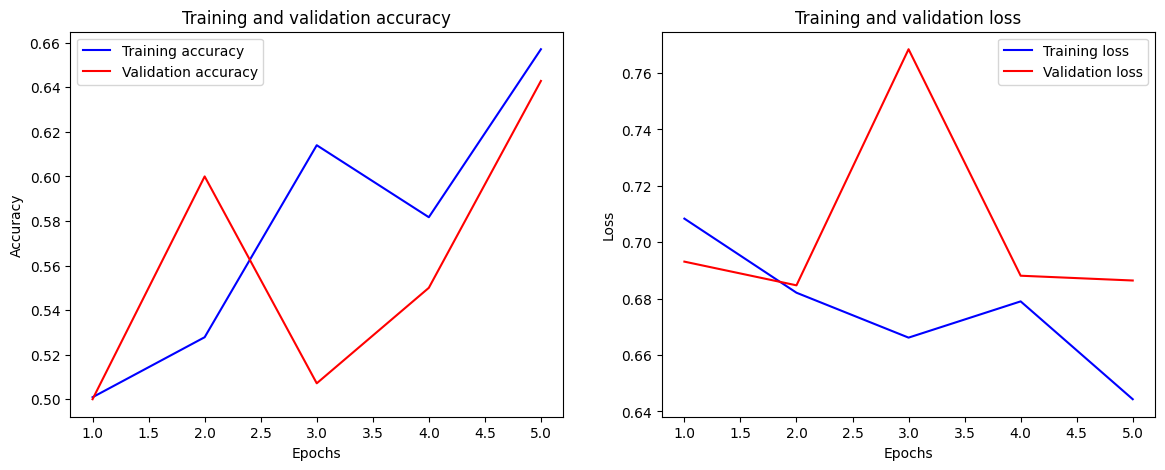

In [75]:

# Визуализация точности и потерь после обучения модели
acc = history.history['accuracy']  # Точность на тренировочных данных
val_acc = history.history['val_accuracy']  # Точность на валидационных данных
loss = history.history['loss']  # Потери на тренировочных данных
val_loss = history.history['val_loss']  # Потери на валидационных данных
epochs = range(1, len(acc) + 1)  # Нумерация эпох

# Построение графиков
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)  # Создание графика в левой части
plt.plot(epochs, acc, 'b', label='Training accuracy')  # Точность на тренировочных данных
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')  # Точность на валидационных данных
plt.title('Training and validation accuracy')  # Заголовок графика
plt.xlabel('Epochs')  # Подпись оси x
plt.ylabel('Accuracy')  # Подпись оси y
plt.legend()  # Легенда графика

# График потерь
plt.subplot(1, 2, 2)  # Создание графика в правой части
plt.plot(epochs, loss, 'b', label='Training loss')  # Потери на тренировочных данных
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # Потери на валидационных данных
plt.title('Training and validation loss')  # Заголовок графика
plt.xlabel('Epochs')  # Подпись оси x
plt.ylabel('Loss')  # Подпись оси y
plt.legend()  # Легенда графика

plt.show()

9.Оценка модели
Оценка производительности модели на тестовом наборе и вывод точности.

In [77]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_generator)  # Оценка потерь и точности на тестовом наборе
print(f"Test accuracy: {test_acc}")  # Выводим точность на тестовом наборе

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.6398 - loss: 0.6778
Test accuracy: 0.6428571343421936


10.Предсказание на тестовых данных и расчет метрик
Модель предсказывает классы для тестовых данных, после чего вычисляются метрики (точность, AUC, матрица ошибок и отчет о классификации).

In [87]:
# Предсказание вероятностей классов на тестовом наборе данных
Y_pred_prob = model.predict(test_generator)  # Предсказание вероятностей классов (кошка/собака)
y_pred = (Y_pred_prob > 0.5).astype(int)  # Преобразование вероятностей в бинарные метки (1 = собака, 0 = кошка)

# Получаем истинные метки из тестового генератора
y_test = test_generator.classes  # Истинные метки

# Функция для вычисления метрик
def compute_evaluation_metric(y_test, y_predicted, y_predicted_prob):
    print("\nAccuracy Score:", accuracy_score(y_test, y_predicted))  # Вывод точности
    print("\nAUC Score:", roc_auc_score(y_test, y_predicted_prob))  # Вывод AUC (площадь под кривой)
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predicted))  # Матрица ошибок
    print('Classification Report')  # Вывод отчета о классификации
    target_names = ['Cat', 'Dog']  # Названия классов
    print(classification_report(y_test, y_pred, target_names=target_names))  # Отчет о классификации

# Вызываем функцию для вычисления метрик
compute_evaluation_metric(y_test, y_pred, Y_pred_prob)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step

Accuracy Score: 0.6142857142857143

AUC Score: 0.6085714285714285

Confusion Matrix:
 [[28 42]
 [12 58]]
Classification Report
              precision    recall  f1-score   support

         Cat       0.70      0.40      0.51        70
         Dog       0.58      0.83      0.68        70

    accuracy                           0.61       140
   macro avg       0.64      0.61      0.60       140
weighted avg       0.64      0.61      0.60       140



11.Визуализация предсказаний
Вывод первые 10 изображений из тестового набора вместе с предсказанными метками модели ("кошка" или "собака").

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step


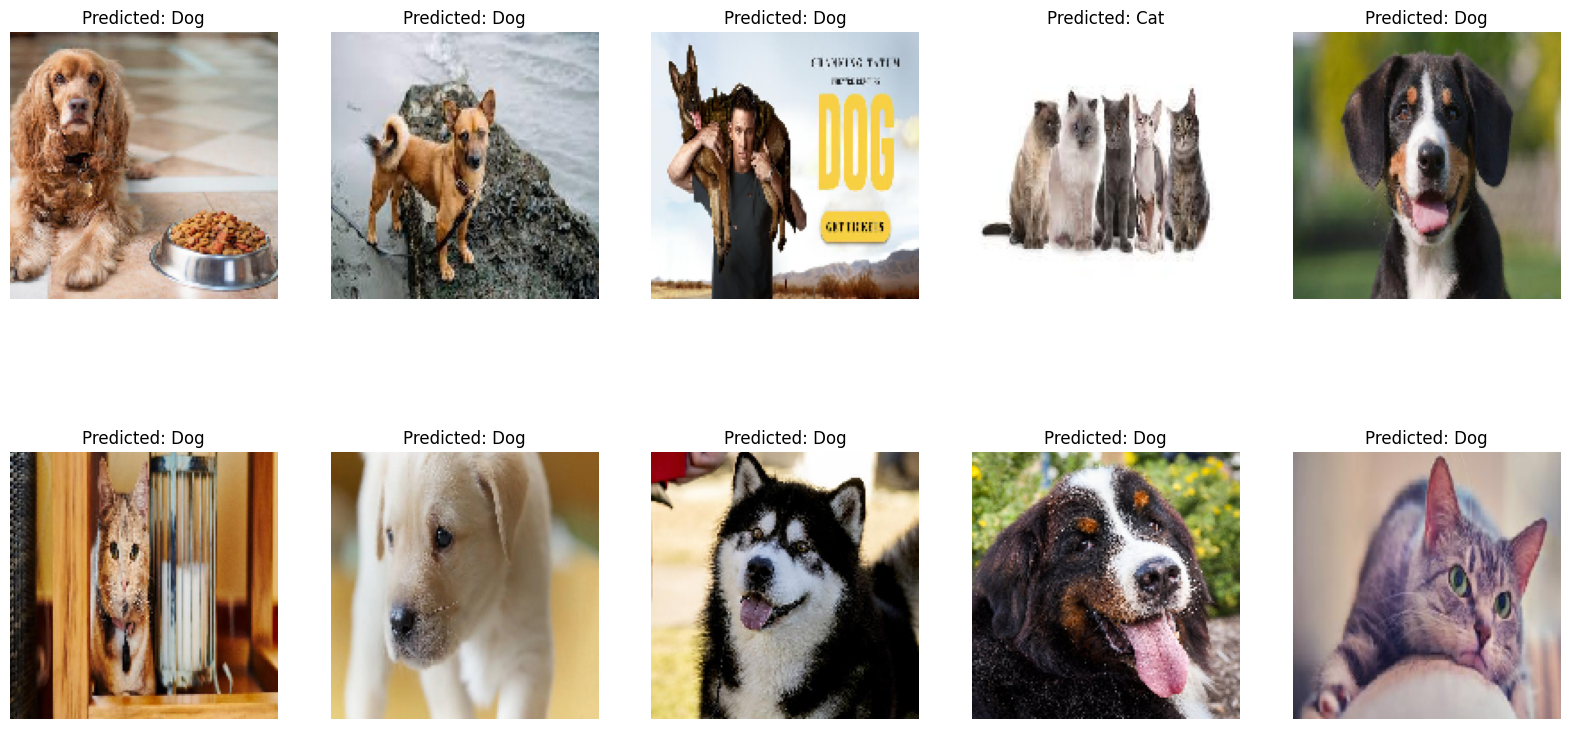

In [88]:
# Визуализация предсказаний модели на тестовых данных
images, labels = next(test_generator)  # Получаем пакет изображений из тестового набора
predictions = model.predict(images)  # Предсказание меток для изображений

# Вывод первых 10 изображений с предсказаниями
plt.figure(figsize=(20, 10))
for i in range(10):  # Проходим по первым 10 изображениям
    plt.subplot(2, 5, i + 1)  # Создаем сетку 2x5
    plt.imshow(images[i])  # Отображаем изображение
    plt.title(f'Predicted: {"Dog" if predictions[i] > 0.5 else "Cat"}')  # Показываем предсказанную метку
    plt.axis('off')  # Отключаем оси для улучшения визуализации
plt.show()